In [ ]:
import pandas as pd
import string


In [ ]:
from nltk import sent_tokenize, word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer
ps = PorterStemmer()

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

DATASET

In [12]:
df = pd.read_csv('ExtractDatasets.csv')

In [13]:
df = df.drop(columns=['id', 'label'], axis=1)
df.head()

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


CONVERT TO LOWERCASE

In [14]:
df['clean_text'] = df['tweet'].str.lower()
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,factsguide: society now #motivation,factsguide: society now #motivation


REMOVE PUNCTUATION

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [17]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,factsguide: society now #motivation,factsguide society now motivation


REMOVE STOPWORDS

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [20]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

In [21]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time urð± ðððð...
4,factsguide: society now #motivation,factsguide society motivation


In [22]:
from collections import Counter
word_count = Counter()
for text in df['clean_text']:
    for word in text.split():
        word_count[word] += 1
        
word_count.most_common(10)

[('user', 17473),
 ('love', 2647),
 ('day', 2198),
 ('happy', 1663),
 ('amp', 1582),
 ('im', 1139),
 ('u', 1136),
 ('time', 1110),
 ('life', 1086),
 ('like', 1042)]

Frequent word removal


In [23]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(3))
def remove_freq_words(text):
    return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

In [24]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_freq_words(x))
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model u take u time urð± ðððð ð...
4,factsguide: society now #motivation,factsguide society motivation


In [25]:
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'airwaves',
 'carnt',
 'chisolm',
 'ibizabringitonmallorcaholidayssummer',
 'isz',
 'mantle',
 'shirley',
 'youuuð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dâ\x9d¤ï¸\x8f',
 'ð\x9f\x99\x8fð\x9f\x8f¼ð\x9f\x8d¹ð\x9f\x98\x8eð\x9f\x8eµ'}

Stemming on Dataset


In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [27]:
df['stemmed_text'] = df['clean_text'].apply(lambda x: stem_words(x))
df.head()

,tweet,clean_text,stemmed_text
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,father dysfunct selfish drag kid dysfunct run
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,thank lyft credit cant use caus dont offer whe...
2,bihday your majesty,bihday majesty,bihday majesti
3,#model i love u take with u all the time in ...,model u take u time urð± ðððð ð...,model u take u time urð± ðððð ð...
4,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv


Lemmatization and POS tagging


In [28]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [29]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

In [30]:

def lemmatize_words(text):
    # find pos tags
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [31]:
df['lemmatized_text'] = df['clean_text'].apply(lambda x: lemmatize_words(x))
df.head()


,tweet,clean_text,stemmed_text,lemmatized_text
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,thank lyft credit cant use caus dont offer whe...,thanks lyft credit cant use cause dont offer w...
2,bihday your majesty,bihday majesty,bihday majesti,bihday majesty
3,#model i love u take with u all the time in ...,model u take u time urð± ðððð ð...,model u take u time urð± ðððð ð...,model u take u time urð± ðððð ð...
4,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv,factsguide society motivation


In [32]:
import re
import pandas as pd
import nltk
import string

In [33]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 15.7 MB/s eta 0:00:00


In [35]:
import contractions
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Stopwords finding and removing

In [36]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'yourselves', 'no', 'until', 'nor', 'we', 'am', 've', 'this', 'further', 'itself', 'there', 'of', 'ma', 'few', 'as', 'can', 'o', 'but', 'mightn', 'after', "you've", "didn't", 'shan', 'shouldn', 'by', 'then', 'such', 'to', 'couldn', 'if', 'out', 'your', 'me', 'too', 'm', "that'll", 'their', 'doing', 'whom', 'is', 'against', 'll', 'other', 'once', 'any', "needn't", 'she', "it's", 'because', 'himself', 's', 'they', 'isn', 'in', 'a', 'ourselves', 'y', 'between', "won't", 'an', 'he', "mightn't", 'and', 'only', 'didn', 'weren', 'his', 'below', 'd', 'into', 'very', "don't", 'yours', 'through', 'i', 'what', 'which', 'those', 'had', 'hers', 'them', 'some', 'for', 'her', 'doesn', "hasn't", 'theirs', 'was', 'that', 'aren', "mustn't", 'be', 'myself', "doesn't", 'so', 'hadn', 'yourself', 'these', 'him', 'will', 'haven', 'about', 'all', "shan't", 'my', 'just', 'here', 'than', 'its', 'both', 'wouldn', "you're", 'should', 'wasn', 'it', 'don', 'why', 'been', 'are', 'during', 'who', 'being', 'did', 'ha

In [37]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [38]:
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'no', 'although', 'nor', 'thru', 'we', 'show', 'go', 'further', 'someone', 'amoungst', 'of', 'anywhere', 'hundred', 'as', 'after', 'done', 'thence', 'such', 'to', 'un', 'if', 'perhaps', 'amongst', 'out', 'whole', 'often', 'seem', 'though', 'several', 'many', 'whom', 'is', 'us', 'wherein', 'others', 'towards', 'once', 'any', 'whither', 'per', 'seems', 'something', 'yet', 'she', 'because', 'himself', 'always', 'whose', 'four', 'an', 'twenty', 'nothing', 'fifty', 'whether', 'along', 'except', 'eight', 'within', 'only', 'eleven', 'via', 'his', 'etc', 'anyhow', 'six', 'every', 'mine', 'would', 'into', 'everywhere', 'must', 'otherwise', 'very', 'yours', 'take', 'what', 'those', 'them', 'some', 'for', 'toward', 'thereafter', 'was', 'that', 'keep', 'be', 'beside', 'whence', 'myself', 'hereby', 'whatever', 'hereupon', 'these', 'sincere', 'found', 'whenever', 'due', 'mill', 'thereby', 'my', 'together', 'everything', 'well', 'three', 'however', 'across', 'anything', 'both', 'whereupon', 'serious

In [39]:
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [40]:

stop=['should','is' ,'in' ,'on' ,'to' ,'and' , 's', 'won', 'his', 'mightn', 'above', 'who', 'such', 'that', 'he', 'had', 'of', 'herself', 't', 'out', 'am', "shan't", 'very', 'those', "wouldn't", 'here', 'with', 'through', "mightn't", 'hasn', 'aren', 'myself', 'before', 'at', "aren't", 'her', "weren't", 'them', 'weren', 'no', 'these', 'don', 'why', "hadn't", 'most', 'their', "haven't", 'doesn', 'yourselves', 'doing', 'themselves', 'we', 'i', 'she', 'hers', 'needn', 'until', 'theirs', 'our', 'how', 'does', 'more', "you'd", 'again', 'while', 'wasn', 'any', 'where', 'haven', 'off', 'my', 'whom', 'couldn', 'me', "isn't", 'as', 'do', 'the', 'is', 'below', 'there', 'once', 'you', "that'll", 'himself', 'being', 'yourself', 'hadn', 'they', 'ourselves', 'has', "wasn't", "you've", "you'll", 'each', 've', "it's", 'didn', 'all', 'shan', 'about', 'under', "mustn't", 'both', 'having', 'ain', 'm', 'or', 'too', 'and', 'from', 'are', 'was', 'few', 'be', "won't", 'did', 'which', 'can', 'now', 'in', 'its', 'wouldn', 'will', 'll', "hasn't", 'other', "didn't", 'shouldn', 'itself', 'than', "you're", 'been', 'what', 'further', 'own', 'o', 'during', 'were', 'some', 'for', 'y', 'up', 'mustn', 'an', 'your', 'nor', 'into', 'after', 'just', 'ma', 'down', 'between', 'same', 'this', 'by', "she's", 'so', "don't", "couldn't", "shouldn't", 'yours', 'on', "doesn't", 'only', 'ours', 'because', 'when', 'd', 'have', 'against', 'then', "should've", "needn't", 'over', 'to', 'isn', 'if', 'him', 're', 'it', 'but', 'least', 'eight', 'latterly', 'formerly', 'whereafter', 'such', 'who', 'whereupon', 'otherwise', 'he', 'of', 'always', 'moreover', 'a', 'out', 'sometime', 'very', 'those', 'anyhow', 'through', 'myself', 'before', 'mostly', 'twenty', 'among', 'name', 'full', 'neither', 'via', 'somehow', 'thereby', 'whenever', 'most', 'around', 'hundred', 'their', 'nobody', 'first', 'fifty', 'whither', 'would', 'seeming', 'find', 'someone', 'until', 'none', 'thence', 'herein', 'hence', 'could', 'again', 'any', 'where', 'due', 'whole', 'three', 'cant', 'eleven', 'as', 'couldnt', 'do', 'there', 'is', 'well', 'once', 'already', 'mill', 'you', 'cry', 'hereafter', 'yourself', 'they', 'go', 'show', 'done', 'upon', 'anywhere', 'one', 'has', 'anyone', 'whether', 'keep', 'must', 'each', 'beforehand', 'if', 'all', 'sixty', 'both', 'beside', 'give', 'indeed', 'former', 'side', 'ltd', 'too', 'but', 'us', 'was', 'back', 'alone', 'thereupon', 'few', 'part', 'hereupon', 'co', 'forty', 'amoungst', 'which', 'less', 'other', 'beyond', 'without', 'than', 'many', 'been', 'further', 'also', 'during', 'some', 'etc', 'for', 'therein', 'con', 'everything', 'bill', 'into', 'please', 'after', 'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','along', 'un', 'down', 'rather', 'ten', 'nothing', 'so', 'four', 'enough', 'anything', 'yours', 'only', 'ours', 'fire', 'eg', 'when', 'meanwhile', 'front', 'thru', 'wherever', 'have', 'against', 'then', 'whereas', 'everywhere', 'whose', 'several', 'him', 're', 'it', 'should', 'his', 'empty', 'become', 'above', 'that', 'anyway', 'move', 'six', 'hasnt', 'another', 'found', 'had', 'herself', 'although', 'therefore', 'am', 'even', 'toward', 'whatever', 'here', 'with', 'de', 'at', 'her', 'no', 'these', 'wherein', 'detail', 'made', 'ie', 'twelve', 'why', 'next', 'top', 'cannot', 'take', 'afterwards', 'inc', 'yourselves', 'though', 'themselves', 'i', 'we', 'she', 'hers', 'becomes', 'bottom', 'our', 'throughout', 'mine', 'behind', 'how', 'more', 'ever', 'nine', 'amongst', 'while', 'still', 'fifteen', 'off', 'my', 'whom', 'thereafter', 'thick', 'call', 'else', 'per', 'thin', 'me', 'never', 'sincere', 'became', 'five', 'across', 'the', 'below', 'himself', 'being', 'may', 'ourselves', 'somewhere', 'seems', 'nevertheless', 'within', 'either', 'seem', 'see', 'elsewhere', 'two', 'onto', 'about', 'or', 'and', 'thus', 'towards', 'sometimes', 'amount', 'from', 'are', 'seemed', 'be', 'nowhere', 'can', 'now', 'often', 'in', 'put', 'its', 'will', 'system', 'everyone', 'however', 'every', 'itself', 'namely', 'something', 'what', 'whereby', 'own', 'becoming', 'fill', 'were', 'up', 'noone', 'an', 'your', 'interest', 'nor', 'latter', 'get', 'almost', 'between', 'might', 'same', 'this', 'by', 'third', 'whoever', 'describe', 'last', 'on', 'because', 'except', 'much', 'over', 'to', 'since', 'yet', 'together', 'perhaps', 'hereby', 'besides', 'whence', 'under', 'serious', 'others', 'them']

Function for all operations

In [41]:
def text_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    new_text = [token for token in new_text.split() if token not in stop]
    new_text = [token for token in new_text if len(token)>2]
    
    clean_text = ''
    for token in new_text:
        clean_text = clean_text + lemmatizer.lemmatize(token) + ' '
    
    return clean_text

In [42]:
cleaned_text = []  
for i in df['lemmatized_text']:
    cleaned_text.append(text_cleaner_with_stopwords(i))

In [43]:
print(cleaned_text) 

['father dysfunctional selfish drag kid dysfunction run ', 'thanks lyft credit use not offer wheelchair van pdx disapointed getthanked ', 'bihday majesty ', 'model time ', 'factsguide society motivation ', 'huge fan fare big talk leave chaos pay dispute allshowandnogo ', 'camp tomorrow danny ', 'school year year exam think school exam hate imagine actorslife revolutionschool girl ', 'land allin cavs champion cleveland clevelandcavaliers ', 'welcome ', 'ireland consumer price index mom climb previous blog silver gold forex ', 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value ', 'daddy today day gettingfed ', 'cnn michigan middle school build wall chant tcot ', 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins ', 'ouchjunior angry got junior yugyoem omg ', 'thankful paner thankful positive ', 'retweet agree ', 'friday smile cooky make people ', 'know essential oil make chemical ', 'euro people blam

Visualize

In [44]:
import matplotlib.pyplot as plt

In [45]:
 clean =[]
 for ct in cleaned_text:
    clean.extend(ct.split())
print(clean)

['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run', 'thanks', 'lyft', 'credit', 'use', 'not', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked', 'bihday', 'majesty', 'model', 'time', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talk', 'leave', 'chaos', 'pay', 'dispute', 'allshowandnogo', 'camp', 'tomorrow', 'danny', 'school', 'year', 'year', 'exam', 'think', 'school', 'exam', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', 'land', 'allin', 'cavs', 'champion', 'cleveland', 'clevelandcavaliers', 'welcome', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'previous', 'blog', 'silver', 'gold', 'forex', 'selfish', 'orlando', 'standwithorlando', 'pulseshooting', 'orlandoshooting', 'biggerproblems', 'selfish', 'heabreaking', 'value', 'daddy', 'today', 'day', 'gettingfed', 'cnn', 'michigan', 'middle', 'school', 'build', 'wall', 'chant', 'tcot', 'comment', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedo

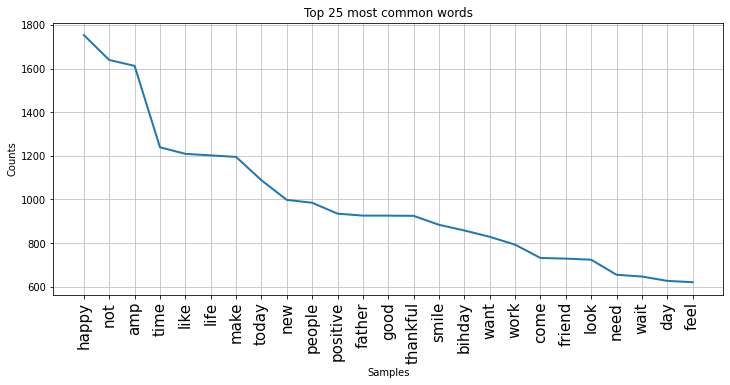

In [46]:
# Frequency Distribution
freq_dist = nltk.FreqDist(clean)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [47]:
import numpy as np
from sklearn.metrics import f1_score

#define array of actual classes
actual = np.repeat([1, 0], repeats=[160, 240])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[120, 40, 70, 170])

#calculate F1 score
f1_score(actual, pred)

0.6857142857142857